### <font color='blue'>Experiments with the kernel Perceptron</font>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Code to load in one of the data files and split it into data `x` and labels `y`.

In [2]:
def load_data(datafile):
    # Load in a 2-d data set. Labels are +1/-1 and each line is a single
    # data point, of the form: x1 x2 y
    data = np.loadtxt(datafile)
    n,d = data.shape
    x = data[:,0:2]
    y = data[:,2]
    return (x,y)

Main code for kernel Perceptron:
* `evaluate`: evaluates a Perceptron given in dual form on a given point
* `train_kernel_perceptron`: trains the kernel Perceptron on a given data set

In either case, the kernel function can be specified and takes an optional parameter (to allow for the `sigma` parameter of the RBF kernel).

In [3]:
#
# Quadratic kernel function
#
def quad_kernel(x, z, param):
    tmp = 1.0 + np.dot(x,z)
    return tmp*tmp
#
# RBF kernel function
#
def rbf_kernel(x, z, sigma):
    tmp = np.linalg.norm(x-z)/sigma
    return np.exp(-tmp*tmp)
#
# Evaluate a classifier (alpha,x,y) on a new point x0
#
def evaluate(alpha, b, x, y, x0, kernel_fun, param):
    value = b
    for i in range(len(alpha)):
        if alpha[i] > 0:
            value += alpha[i] * y[i] * kernel_fun(x[i,:], x0, param)
    return np.sign(value)
# 
# Train a kernel perceptron
#
def train_kernel_perceptron(x, y, kernel_fn, param=1.0):
    n,d = x.shape
    working = True
    alpha = np.zeros(n)
    b = 0.0
    while working:
        working = False
        I = np.random.permutation(n)
        for i in range(n):
            j = I[i]
            if (evaluate(alpha, b, x, y, x[j,:], kernel_fn, param) != y[j]):
                working = True
                alpha[j] += 1
                b += y[j]
    return alpha, b

Code to plot the decision boundary of the kernel Perceptron.

In [4]:
def show_boundary(x,y,alpha,b,kernel_fn,param=1.0):
    delta = 0.05
    xmin = min(x[:,0]) - 1
    xmax = max(x[:,0]) + 1
    ymin = min(x[:,1]) - 1
    ymax = max(x[:,1]) + 1
    xx, yy = np.meshgrid(np.arange(xmin, xmax, delta), np.arange(ymin, ymax, delta))
    grid = np.c_[xx.ravel(), yy.ravel()]
    gn, gp = grid.shape
    Z = np.zeros(gn)
    for i in range(gn):
        Z[i] = evaluate(alpha, b, x, y, grid[i,:], kernel_fn, param)
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.PRGn, vmin=-3, vmax=3)

    # Identify the support vectors
    sv = (alpha > 0)
    notsv = np.logical_not(sv)

    # Plot also the training points
    plt.plot(x[(y==1)*notsv,0], x[(y==1)*notsv,1], 'ro')
    plt.plot(x[(y==1)*sv,0], x[(y==1)*sv,1], 'ro', markersize=10)
    plt.plot(x[(y==-1)*notsv,0], x[(y==-1)*notsv,1], 'k^')
    plt.plot(x[(y==-1)*sv,0], x[(y==-1)*sv,1], 'k^', markersize=10)

    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.show()

A routine that trains a kernel Perceptron and displays the boundary.

In [5]:
def train_and_show(x,y,kernel_fn,param=1.0):
    alpha, b = train_kernel_perceptron(x,y,kernel_fn,param)
    show_boundary(x,y,alpha,b,kernel_fn,param)
    return alpha, b

Let's train (and display) three kernel Perceptrons on `data1.txt`: one using the quadratic kernel, and two using the RBF kernel, with `sigma` values 1.0 and 10.0.

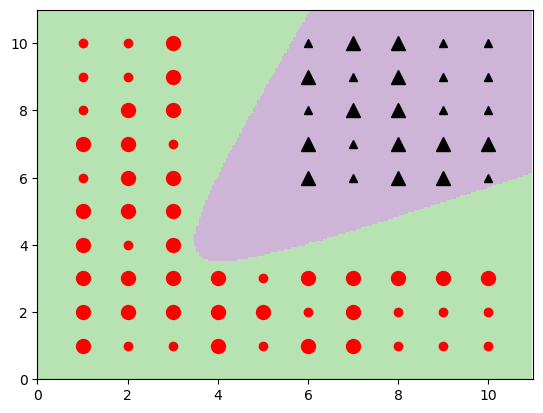

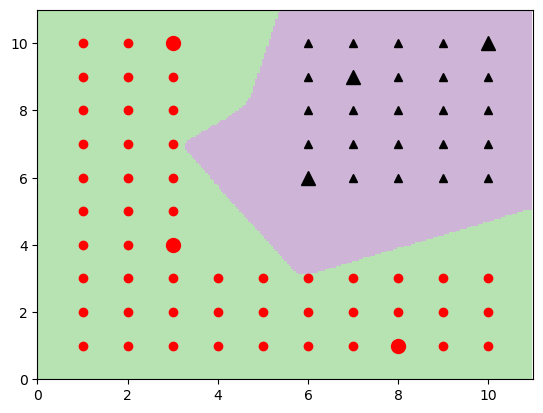

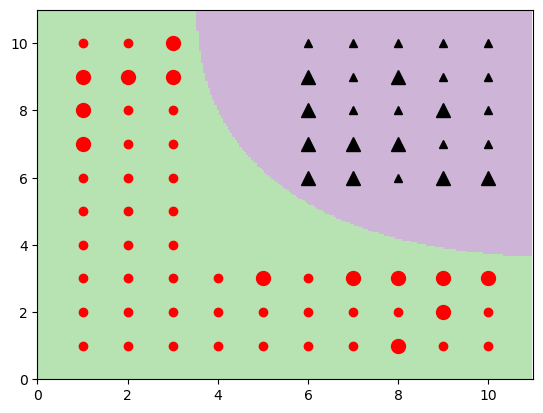

In [6]:
x,y = load_data('data1.txt')
alpha, b = train_and_show(x,y,quad_kernel)
alpha, b = train_and_show(x,y,rbf_kernel,1.0)
alpha, b = train_and_show(x,y,rbf_kernel,10.0)

Same thing for `data2.txt`.

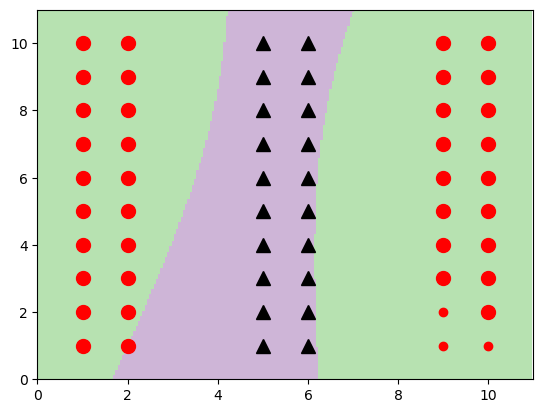

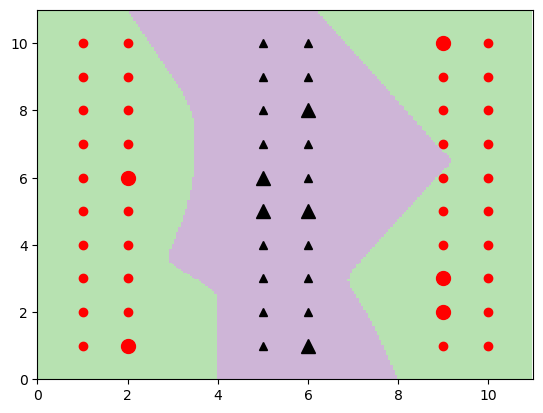

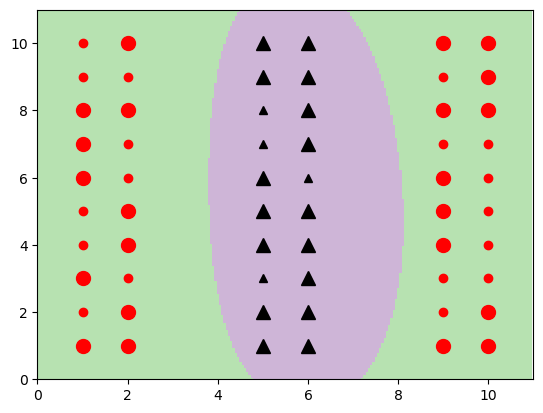

In [7]:
x,y = load_data('data2.txt')
alpha, b = train_and_show(x,y,quad_kernel)
alpha, b = train_and_show(x,y,rbf_kernel,1.0)
alpha, b = train_and_show(x,y,rbf_kernel,10.0)